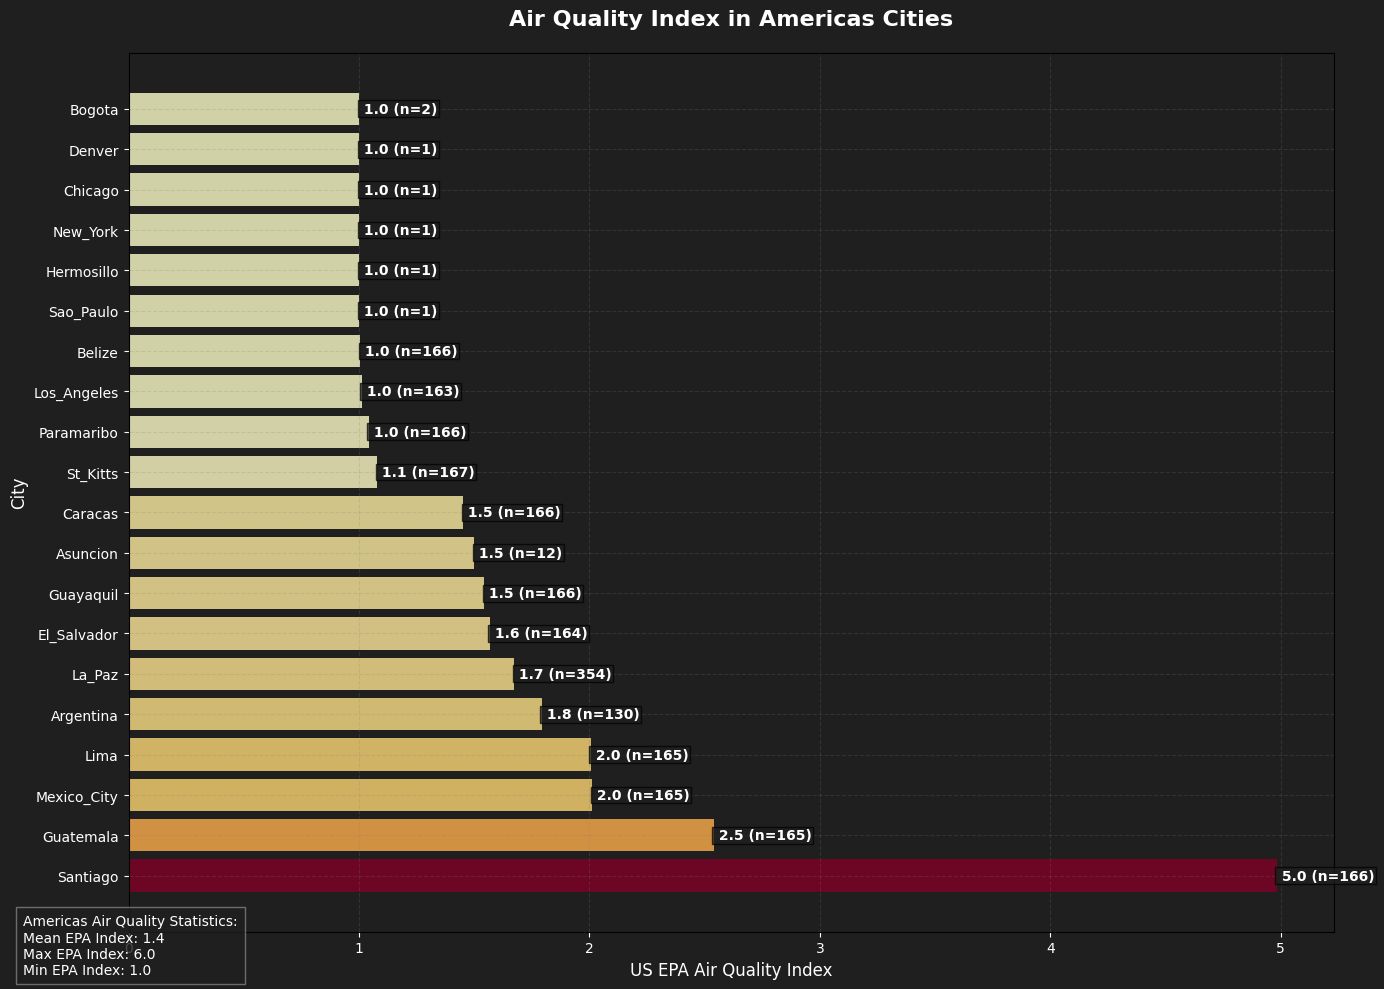

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_americas_air_quality_plot(data):
    # Filter for Americas timezones (including both North and South America)
    americas_data = data[data['timezone'].str.startswith('America/')].copy()
    
    # Process timezone data
    timezone_stats = americas_data.groupby('timezone')['air_quality_us-epa-index'].agg(['mean', 'count']).reset_index()
    
    # Create shortened timezone labels (remove 'America/' prefix)
    timezone_stats['city'] = timezone_stats['timezone'].str.split('/', expand=True)[1]
    
    # Sort by mean value
    timezone_stats = timezone_stats.sort_values('mean', ascending=False)
    
    # Select top 10 and bottom 10 cities
    top_10 = timezone_stats.head(10)
    bottom_10 = timezone_stats.tail(10)
    selected_cities = pd.concat([top_10, bottom_10])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Set dark background
    background_color = '#1f1f1f'
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)
    ax.grid(True, linestyle='--', alpha=0.2, color='gray')
    
    # Create color gradient
    air_quality_values = selected_cities['mean']
    norm = plt.Normalize(air_quality_values.min(), air_quality_values.max())
    colors = plt.cm.YlOrRd(norm(air_quality_values))  # Yellow to Red gradient
    
    # Create horizontal bar chart with gradient colors
    bars = ax.barh(range(len(selected_cities)), selected_cities['mean'], 
                   color=colors, alpha=0.8)
    
    # Add value labels for bars
    for idx, (bar, count) in enumerate(zip(bars, selected_cities['count'])):
        width = bar.get_width()
        ax.text(width, idx,
                f' {width:.1f} (n={count})',
                ha='left', va='center', color='white',
                fontsize=10, fontweight='bold',
                bbox=dict(facecolor=background_color, alpha=0.7, pad=1))
    
    # Customize axis labels
    ax.set_yticks(range(len(selected_cities)))
    ax.set_yticklabels(selected_cities['city'], fontsize=10)
    
    # Customize plot
    ax.set_title('Air Quality Index in Americas Cities', 
                color='white', pad=20, fontsize=16, fontweight='bold')
    ax.set_xlabel('US EPA Air Quality Index', color='white', fontsize=12)
    ax.set_ylabel('City', color='white', fontsize=12)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    # Add summary statistics
    stats_text = (f"Americas Air Quality Statistics:\n"
                 f"Mean EPA Index: {americas_data['air_quality_us-epa-index'].mean():.1f}\n"
                 f"Max EPA Index: {americas_data['air_quality_us-epa-index'].max():.1f}\n"
                 f"Min EPA Index: {americas_data['air_quality_us-epa-index'].min():.1f}")
    
    fig.text(0.02, 0.02, stats_text, color='white', fontsize=10,
             bbox=dict(facecolor=background_color, alpha=0.8, 
                      edgecolor='gray', pad=5))
    
    plt.tight_layout()
    return fig, ax

# Usage
table = pd.read_csv("GlobalWeatherRepository.csv")
fig, ax = create_americas_air_quality_plot(table)
plt.show()